In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout, Activation, Flatten
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras import Sequential
from sklearn.model_selection import train_test_split
from tensorflow.keras.activations import linear, relu
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.optimizers import Adam
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [2]:
def scheduler(epoch, lr):
    if epoch < 1:
        return lr
    return lr / (1 + 0.001 * epoch)
    
callback = LearningRateScheduler(scheduler)

In [3]:
lr = 2.3
for i in range(100):
    lr = scheduler(i, lr)
#     print(lr, i)

In [4]:
df = pd.read_excel('dataset/cleaned_data/cleaned_building.xlsx')

In [5]:
df = df.drop(['region', 'nan'], axis=1)
df = df.astype(float)
df

,"Общая площадь, м²",Год постройки (сдачи в эксплуатацию),В залоге,Количество уровней,Тип строения,Состояние,Потолки,price,Кол-во телефонных линий,Парковка,круглосуточная охрана,пожарная сигнализация,сигнализация,видеонаблюдение,решетки на окнах,через TV кабель,ADSL,оптика,проводной
0,214.0,1989.0,0.0,1.0,3.0,3.0,2.700000,300000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,550.0,1990.0,0.0,1.0,3.0,3.0,3.546487,70000000.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1080.0,2015.0,0.0,2.0,1.0,4.0,3.546487,650000000.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2300.0,2011.0,0.0,2.0,3.0,-1.0,4.000000,450000000.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
4,600.0,2021.0,1.0,1.0,3.0,-1.0,3.800000,112000000.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4359,850.0,2007.0,0.0,3.0,3.0,4.0,5.000000,258000000.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4360,2500.0,2017.0,0.0,4.0,2.0,4.0,3.500000,400000000.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
4361,600.0,2010.0,0.0,2.0,3.0,4.0,3.546487,73000000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4362,3900.0,2017.0,0.0,2.0,2.0,5.0,5.000000,650000000.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4364 entries, 0 to 4363
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Общая площадь, м²                     4364 non-null   float64
 1   Год постройки (сдачи в эксплуатацию)  4364 non-null   float64
 2   В залоге                              4364 non-null   float64
 3   Количество уровней                    4364 non-null   float64
 4   Тип строения                          4364 non-null   float64
 5   Состояние                             4364 non-null   float64
 6   Потолки                               4364 non-null   float64
 7   price                                 4364 non-null   float64
 8   Кол-во телефонных линий               4364 non-null   float64
 9   Парковка                              4364 non-null   float64
 10  круглосуточная охрана                 4364 non-null   float64
 11  пожарная сигнализ

In [7]:
X = df.drop(['price'], axis=1)
y = df['price']

In [8]:
Scaler = MinMaxScaler()
mse = MeanSquaredError()

In [9]:
X_std = Scaler.fit_transform(X)
X_train_std, X_test_std, y_train_std, y_test_std = train_test_split(X_std,y, test_size=0.2)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
# model = Sequential([
    
#     Flatten(input_shape=[18, 1]),
    
#     Dense(128),
#     Activation('relu'),
    
#     Dropout(0.5),
#     Dense(256),
#     BatchNormalization(),
#     Activation('relu'),
    
#     Dropout(0.5),
#     Dense(256),
#     BatchNormalization(),
#     Activation('relu'),
    
#     Dense(1),
#     Activation('linear')
# ])

# model.compile(loss=MeanSquaredError(), optimizer=Adam(1.3))

# model.fit(X_train, y_train, epochs=100, callbacks = callback, batch_size=182)

In [33]:
model = Sequential([
    
    Flatten(input_shape=[18, 1]),
    
    Dense(128),
    Activation('relu'),
    
    Dropout(0.5),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    
    Dropout(0.5),
    Dense(256),
    BatchNormalization(),
    Activation('relu'),
    
    Dense(1),
    Activation('linear')
])

model.compile(loss=MeanSquaredError(), optimizer=Adam())

In [34]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 18)                0         
                                                                 
 dense_8 (Dense)             (None, 128)               2432      
                                                                 
 activation_8 (Activation)   (None, 128)               0         
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_9 (Dense)             (None, 256)               33024     
                                                                 
 batch_normalization_4 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                      

In [35]:
round(model.evaluate(X_train_std, y_train_std))

110/110 [==============================] - 1s 9ms/step - loss: 1192927647500337152.0000


1192927647500337152

In [ ]:
history = model.fit(X_train, y_train, epochs=1000)

Epoch 1/1000
110/110 [==============================] - 3s 23ms/step - loss: 1235769980637675520.0000
Epoch 2/1000
110/110 [==============================] - 2s 21ms/step - loss: 1235769430881861632.0000
Epoch 3/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235768468809187328.0000
Epoch 4/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235767506736513024.0000
Epoch 5/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235766682102792192.0000
Epoch 6/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235766819541745664.0000
Epoch 7/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235765170274304000.0000
Epoch 8/1000
110/110 [==============================] - 2s 21ms/step - loss: 1235764620518490112.0000
Epoch 9/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235763383567908864.0000
Epoch 10/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235

110/110 [==============================] - 2s 20ms/step - loss: 1235690128605708288.0000
Epoch 81/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235689853727801344.0000
Epoch 82/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235687792143499264.0000
Epoch 83/1000
110/110 [==============================] - 2s 21ms/step - loss: 1235686555192918016.0000
Epoch 84/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235686280315011072.0000
Epoch 85/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235683119219081216.0000
Epoch 86/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235681332512686080.0000
Epoch 87/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235679683245244416.0000
Epoch 88/1000
110/110 [==============================] - 2s 20ms/step - loss: 1235677346783035392.0000
Epoch 89/1000
110/110 [==============================] - 2s 20ms/step - loss: 123567597

NameError: name 'plt' is not defined

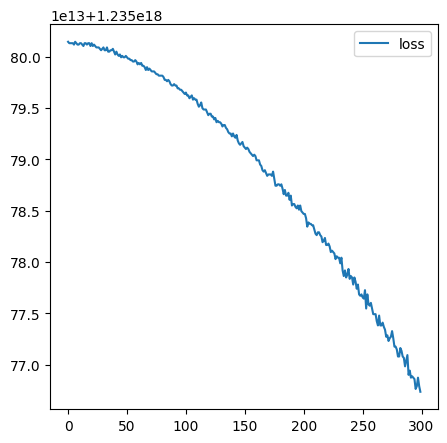

In [38]:
history_df = pd.DataFrame(history.history)

history_df.plot(figsize=(5,5))
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

In [ ]:
# model.get_weights()

In [39]:
y_pred_train = model.predict(X_train_std)
y_pred_train = y_pred_train - (y_pred_train % 100000)

y_pred_test = model.predict(X_test_std)
y_pred_test = y_pred_test - (y_pred_test % 100000)

28/28 [==============================] - 0s 6ms/step


In [40]:
tf.math.sqrt(mse(y_train_std, y_pred_train))

<tf.Tensor: shape=(), dtype=float64, numpy=1092212287.734933>

In [41]:
tf.math.sqrt(mse(y_test_std, y_pred_test))

<tf.Tensor: shape=(), dtype=float64, numpy=780921516.4755324>

In [42]:
a = []
for i in y_pred_test:
    a.append(i[0])

error = 0
for i,j in zip(a, y_test_std):
#     print(f"predicred: {i}, real: {j}")
    error += abs(i - j)

In [43]:
error / 873

370384737.4364261

In [ ]:
# XGBRegressor: 590556000-STD 412411800
# LinearRegression 614346978 500008585